Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: Us

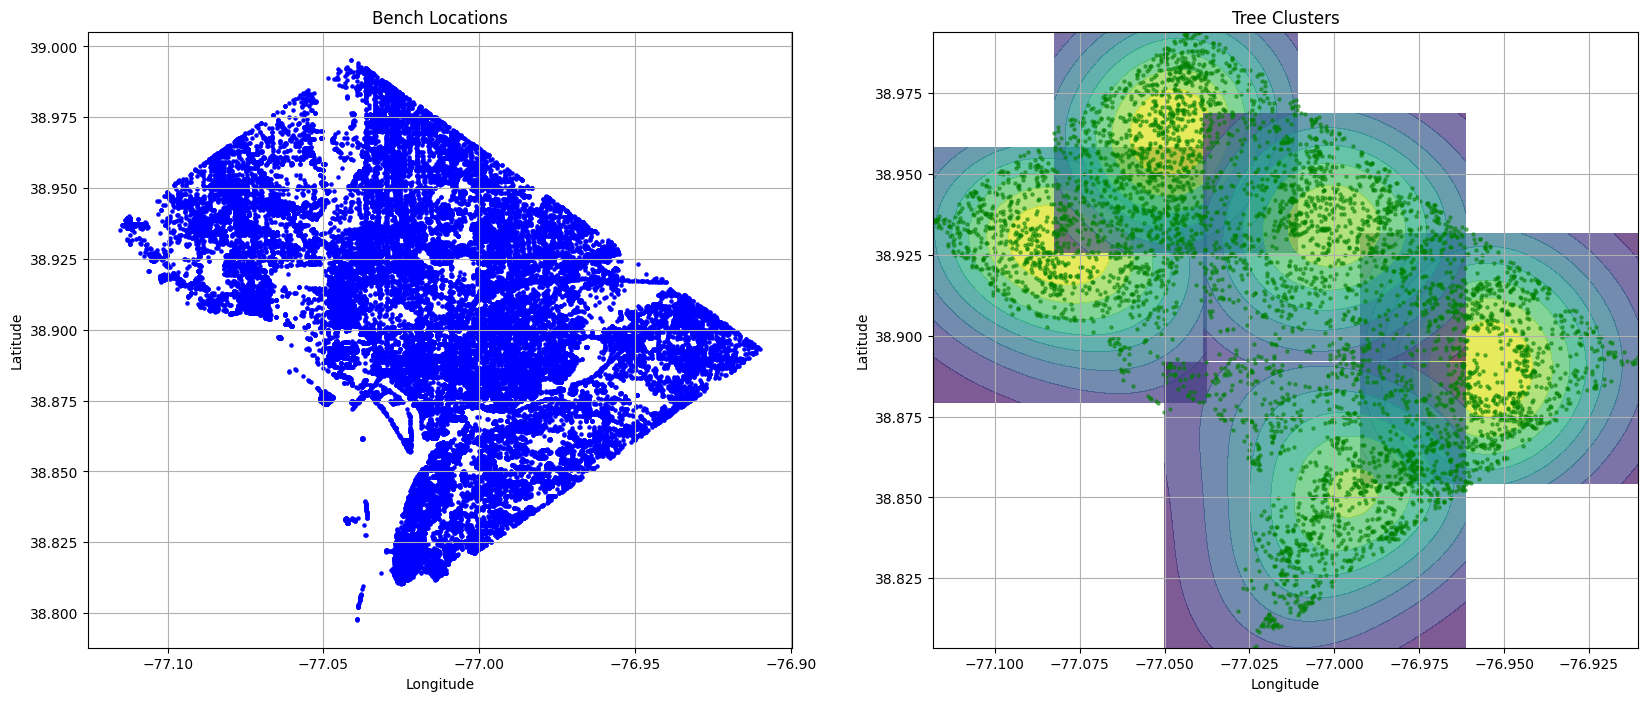

In [ ]:
# Section used to plot all bench locations
# Section used to plot and calculate the density of trees ONLY
# I ended up combining these in a combined plot, and added in another section of code later containing the density for just the benches

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from IPython.display import display
from sklearn.utils import shuffle

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data
benches_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Data/Benches (1).csv')
trees_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Data/DC_Estimated_Trees.csv')

# Remove rows with missing values
trees_df.dropna(inplace=True)

# Fit KMeans clustering on tree locations
n_clusters = 5  # Adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(trees_df[['X', 'Y']])

# Add cluster labels to tree data frame
trees_df['Cluster'] = kmeans.labels_

# Plot bench locations and tree clusters using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot bench locations
ax1.scatter(benches_df['X'], benches_df['Y'], color='blue', label='Benches', s=5)  # Adjust point size
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Bench Locations')
ax1.grid(True)

# Plot tree clusters using Kernel Density Estimation (KDE)
max_density = 0
for cluster_label in range(n_clusters):
    cluster_mask = trees_df['Cluster'] == cluster_label
    subset_trees = shuffle(trees_df[cluster_mask], random_state=42)[:1000]  # Sample 1000 points for KDE
    kde = KernelDensity(bandwidth=0.02)  # Adjust bandwidth
    kde.fit(subset_trees[['X', 'Y']])
    xx, yy = np.meshgrid(np.linspace(subset_trees['X'].min(), subset_trees['X'].max(), 100),
                         np.linspace(subset_trees['Y'].min(), subset_trees['Y'].max(), 100))
    z = np.exp(kde.score_samples(np.stack([xx.ravel(), yy.ravel()], axis=1)))
    max_density = max(max_density, z.max())
    ax2.contourf(xx, yy, z.reshape(xx.shape), cmap='viridis', alpha=0.7, levels=np.linspace(0, max_density, 10))

# Plot all tree clusters
for cluster_label in range(n_clusters):
    cluster_mask = trees_df['Cluster'] == cluster_label
    subset_trees = shuffle(trees_df[cluster_mask], random_state=42)[:1000]  # Sample 1000 points for KDE
    ax2.scatter(subset_trees['X'], subset_trees['Y'], color='green', s=5, alpha=0.5)  # Adjust point size and transparency

ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('Tree Clusters')
ax2.grid(True)

# Display the combined plot
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


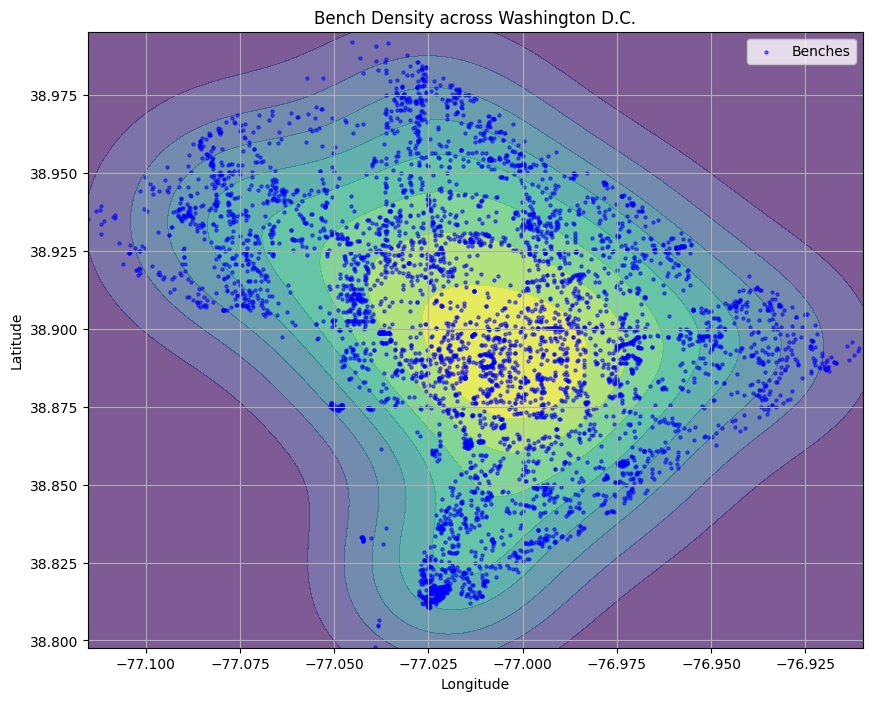

In [ ]:
# Section of code used to calculate density of benches ONLY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks
from IPython.display import display
from sklearn.utils import shuffle

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data
benches_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Data/Benches (1).csv')

# Remove rows with missing values
benches_df.dropna(inplace=True)

# Define the grid for KDE estimation
x_min, x_max = benches_df['X'].min(), benches_df['X'].max()
y_min, y_max = benches_df['Y'].min(), benches_df['Y'].max()
x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_grid, y_grid)

# Flatten the grids for KDE estimation
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Increase the number of samples for KDE
subset_benches = shuffle(benches_df, random_state=42)[:5000]  # Adjust the number of samples

# Fit KDE on bench locations
kde = KernelDensity(bandwidth=0.02)  # Adjust bandwidth
kde.fit(subset_benches[['X', 'Y']])

# Calculate the density
z = np.exp(kde.score_samples(xy))
z = z.reshape(xx.shape)

# Plot KDE contour
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, z, cmap='viridis', alpha=0.7, levels=np.linspace(0, z.max(), 10))

# Plot all bench locations
plt.scatter(subset_benches['X'], subset_benches['Y'], color='blue', label='Benches', s=5, alpha=0.5)  # Adjust point size and transparency

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bench Density across Washington D.C.')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


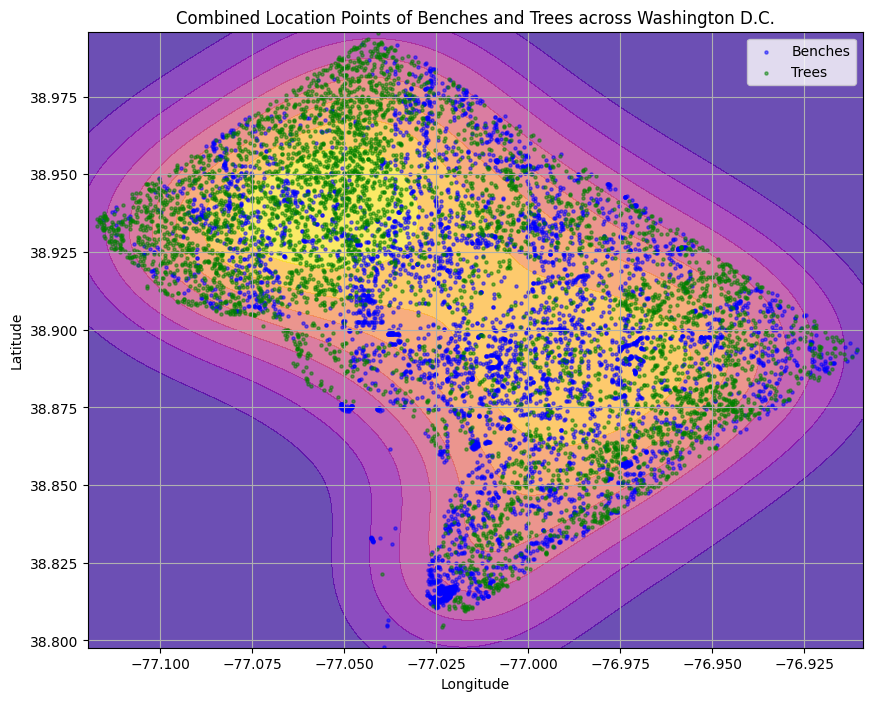

In [ ]:
# Section of code used to calculate the locations of BOTH benches and trees across DC

import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load benches data
benches_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Data/Benches (1).csv')

# Load trees data
trees_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Data/DC_Estimated_Trees.csv')

# Remove rows with missing values
benches_df.dropna(inplace=True)
trees_df.dropna(inplace=True)

# Define the grid for KDE estimation
x_min_benches, x_max_benches = benches_df['X'].min(), benches_df['X'].max()
y_min_benches, y_max_benches = benches_df['Y'].min(), benches_df['Y'].max()
x_min_trees, x_max_trees = trees_df['X'].min(), trees_df['X'].max()
y_min_trees, y_max_trees = trees_df['Y'].min(), trees_df['Y'].max()

x_min = min(x_min_benches, x_min_trees)
x_max = max(x_max_benches, x_max_trees)
y_min = min(y_min_benches, y_min_trees)
y_max = max(y_max_benches, y_max_trees)

x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_grid, y_grid)

# Flatten the grids for KDE estimation
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Increase the number of samples for KDE
subset_benches = shuffle(benches_df, random_state=42)[:5000]  # Adjust the number of samples
subset_trees = shuffle(trees_df, random_state=42)[:5000]  # Adjust the number of samples

# Fit KDE on bench locations
kde_benches = KernelDensity(bandwidth=0.02)  # Adjust bandwidth
kde_benches.fit(subset_benches[['X', 'Y']])

# Fit KDE on tree locations
kde_trees = KernelDensity(bandwidth=0.02)  # Adjust bandwidth
kde_trees.fit(subset_trees[['X', 'Y']])

# Calculate density for benches
z_benches = np.exp(kde_benches.score_samples(xy))
z_benches = z_benches.reshape(xx.shape)

# Calculate density for trees
z_trees = np.exp(kde_trees.score_samples(xy))
z_trees = z_trees.reshape(xx.shape)

# Sum the densities to visualize the correlation
z_combined = z_benches + z_trees

# Plot combined KDE contour
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, z_combined, cmap='plasma', alpha=0.7, levels=np.linspace(0, z_combined.max(), 10))

# Plot all bench locations
plt.scatter(subset_benches['X'], subset_benches['Y'], color='blue', label='Benches', s=5, alpha=0.5)  # Adjust point size and transparency

# Plot all tree locations
plt.scatter(subset_trees['X'], subset_trees['Y'], color='green', label='Trees', s=5, alpha=0.5)  # Adjust point size and transparency

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Combined Location Points of Benches and Trees across Washington D.C.')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


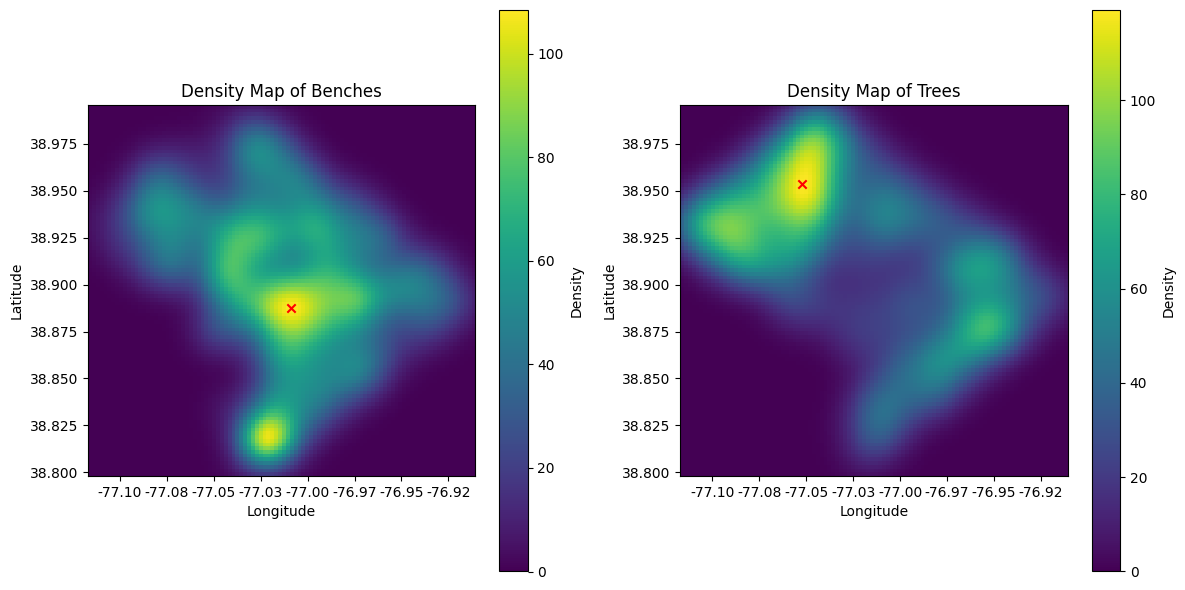

In [ ]:
# Section of code used to calculate the heat mapping of BOTH benches and trees
# This was the hardest one to calculate properly, which is why it is the last map in the set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Load benches data
benches_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Data/Benches (1).csv')

# Load trees data
trees_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Data/DC_Estimated_Trees.csv')

# Remove rows with missing values
benches_df.dropna(inplace=True)
trees_df.dropna(inplace=True)

# Randomly sample a subset of points from both datasets
subset_benches = benches_df.sample(n=min(len(benches_df), 5000), random_state=42)
subset_trees = trees_df.sample(n=min(len(trees_df), 5000), random_state=42)

# Fit KDE on bench locations
kde_benches = KernelDensity(bandwidth=0.01)  # Adjust bandwidth
kde_benches.fit(subset_benches[['X', 'Y']].values)

# Fit KDE on tree locations
kde_trees = KernelDensity(bandwidth=0.01)  # Adjust bandwidth
kde_trees.fit(subset_trees[['X', 'Y']].values)

# Define the grid for KDE estimation
x_min_benches, x_max_benches = subset_benches['X'].min(), subset_benches['X'].max()
y_min_benches, y_max_benches = subset_benches['Y'].min(), subset_benches['Y'].max()
x_min_trees, x_max_trees = subset_trees['X'].min(), subset_trees['X'].max()
y_min_trees, y_max_trees = subset_trees['Y'].min(), subset_trees['Y'].max()

x_min = min(x_min_benches, x_min_trees)
x_max = max(x_max_benches, x_max_trees)
y_min = min(y_min_benches, y_min_trees)
y_max = max(y_max_benches, y_max_trees)

x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_grid, y_grid)

# Flatten the grids for KDE estimation
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Calculate density for benches
densities_benches = np.exp(kde_benches.score_samples(xy))
densities_benches = densities_benches.reshape(xx.shape)

# Calculate density for trees
densities_trees = np.exp(kde_trees.score_samples(xy))
densities_trees = densities_trees.reshape(xx.shape)

# Find the density centers of benches and trees
peak_benches = np.unravel_index(np.argmax(densities_benches), densities_benches.shape)
peak_trees = np.unravel_index(np.argmax(densities_trees), densities_trees.shape)

# Plot the density centers of benches and trees
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

im1 = axs[0].imshow(densities_benches, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='viridis')
axs[0].scatter(xx[peak_benches], yy[peak_benches], color='red', marker='x', label='Density Center of Benches')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].set_title('Density Map of Benches')

im2 = axs[1].imshow(densities_trees, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='viridis')
axs[1].scatter(xx[peak_trees], yy[peak_trees], color='red', marker='x', label='Density Center of Trees')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].set_title('Density Map of Trees')

# Define custom tick formatter for longitude axis
def longitude_formatter(x, pos):
    return f'{x:.2f}'

# Apply custom tick formatter to longitude axis
for ax in axs:
    ax.xaxis.set_major_formatter(longitude_formatter)

# Add colorbars to make heat map
cbar1 = fig.colorbar(im1, ax=axs[0], label='Density')
cbar2 = fig.colorbar(im2, ax=axs[1], label='Density')

plt.tight_layout()
plt.show()
